In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import torch
from torchvision import transforms, models
import cv2
from torchvision.utils import save_image

# Download and Load Model
- https://pytorch.org/docs/stable/torchvision/models.html#fully-convolutional-networks
- https://pytorch.org/docs/stable/torchvision/models.html#deeplabv3

In [2]:
model = models.segmentation.deeplabv3_resnet101(pretrained=True).eval()

# Create Color Palette

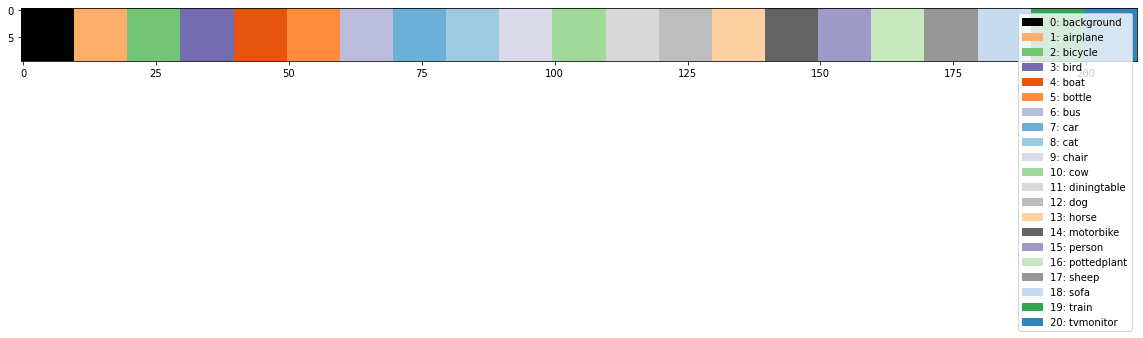

In [3]:
labels = ['background', 'airplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor']

cmap = plt.cm.get_cmap('tab20c')

colors = (cmap(np.arange(cmap.N)) * 255).astype(np.int)[:, :3].tolist()



np.random.seed(2020)
np.random.shuffle(colors)
colors.insert(0, [0, 0, 0]) # background color must be black
colors = np.array(colors, dtype=np.uint8)

palette_map = np.empty((10, 0, 3), dtype=np.uint8)
legend = []

for i in range(21):
    legend.append(mpatches.Patch(color=np.array(colors[i]) / 255., label='%d: %s' % (i, labels[i])))
    c = np.full((10, 10, 3), colors[i], dtype=np.uint8)
    palette_map = np.concatenate([palette_map, c], axis=1)

plt.figure(figsize=(20, 2))
plt.legend(handles=legend)
plt.imshow(palette_map)


# Segment Function

In [4]:
def segment(net, img):
    preprocess = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        ),
    ])
    input_tensor = preprocess(img)
    input_batch = input_tensor.unsqueeze(0)

    if torch.cuda.is_available():
        input_batch = input_batch.to('cuda')
        model.to('cuda')

    output = model(input_batch)['out'][0] # (21, height, width)
    #스칼라로 0 차원이다 

    output_predictions = output.argmax(0).byte().cpu().numpy() # (height, width) 
    #numpy 로 가져온다
    r = Image.fromarray(output_predictions).resize((img.shape[1], img.shape[0]))
    #numpy로 가져온걸 array로 pillow image로 가져온다 
    r.putpalette(colors)

    return r, output_predictions

# Result

In [8]:
'''
import cv2 
#재생할 동영상 파일 
cap = cv2.VideoCapture('C:/Study/iumusic.mp4') 
fourcc = cv2.VideoWriter_fourcc(* 'XVID') 
while(True): 
    ret, img_color = cap.read() 
#동영상을 끝까지 재생하면 무한루프에서 빠져나옴 
    if ret == False: 
        break 
    cv2.imshow("Color", img_color) 
#키보드 입력을 받기 위해서 대기시간 1초 줌 
    if cv2.waitKey(1)&0xFF == 1: 
        break 

#자원 메모리 해제 
cap.release() 
cv2.destroyAllWindows()
'''

import cv2
 
# cap = cv2.VideoCapture(0)   # 0: default camera
cap = cv2.VideoCapture('C:/Study/iumusic.mp4') #동영상 파일에서 읽기
 
# while cap.isOpened():
#     # 카메라 프레임 읽기
#     success, frame = cap.read()
#     if success:
#         # 프레임 출력
#         cv2.imshow('Camera Window', frame)
 
#         # ESC를 누르면 종료
#         key = cv2.waitKey(10) & 0xFF
#         if (key == 27): 
#             break
 
# cap.release()
# cv2.destroyAllWindows()
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
print("size: {0} x {1}".format(width, height))

'''
# 이미지 리사이즈 ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ#
# img = cv2.imread('C:/Study/semantic-segmentation-pytorch-master/imgs/name2.jpg') # rgb 이미지 보기

# img = cv2.resize(img, (1000, 500))
# cv2.imwrite('C:/Study/semantic-segmentation-pytorch-master/imgs/name2.png',img)
#ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ#
img = np.array(Image.open('C:/Study/semantic-segmentation-pytorch-master/imgs/iu_result_8.png').convert('RGB'))


# img = np.array(Image.open('C:/Study/semantic-segmentation-pytorch-master/imgs/name.jpg').convert('RGB'))


fg_h, fg_w, _ = img.shape

segment_map, pred = segment(model, img)

fig, axes = plt.subplots(1, 2, figsize=(20, 10))
axes[0].imshow(img)
axes[1].imshow(segment_map)
'''

size: 1280.0 x 720.0


"\n# 이미지 리사이즈 ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ#\n# img = cv2.imread('C:/Study/semantic-segmentation-pytorch-master/imgs/name2.jpg') # rgb 이미지 보기\n\n# img = cv2.resize(img, (1000, 500))\n# cv2.imwrite('C:/Study/semantic-segmentation-pytorch-master/imgs/name2.png',img)\n#ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ#\nimg = np.array(Image.open('C:/Study/semantic-segmentation-pytorch-master/imgs/iu_result_8.png').convert('RGB'))\n\n\n# img = np.array(Image.open('C:/Study/semantic-segmentation-pytorch-master/imgs/name.jpg').convert('RGB'))\n\n\nfg_h, fg_w, _ = img.shape\n\nsegment_map, pred = segment(model, img)\n\nfig, axes = plt.subplots(1, 2, figsize=(20, 10))\naxes[0].imshow(img)\naxes[1].imshow(segment_map)\n"

# Load Background Image and Resize
- make same size as foreground

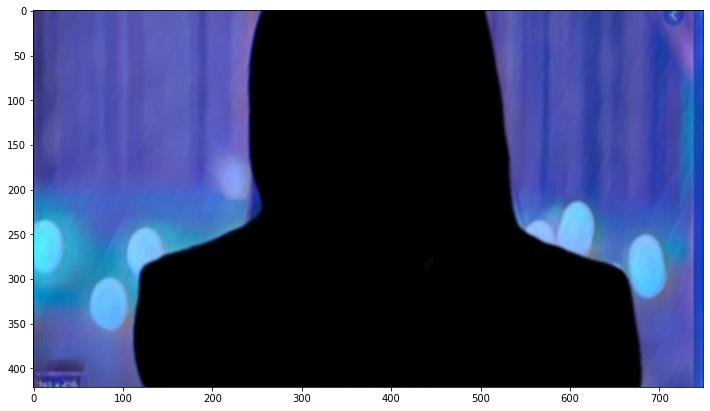

In [12]:
background = np.array(Image.open('C:/Study/semantic-segmentation-pytorch-master/imgs/HD_iu_result_6.jpg').convert('RGB'))
bg_h, bg_w, _ = background.shape

# fit to fg width
background = cv2.resize(background, dsize=(fg_w, int(fg_w * bg_h / bg_w)))

bg_h, bg_w, _ = background.shape

margin = (bg_h - fg_h) // 2

if margin > 0:
    background = background[margin:-margin, :, :]
else:
    background = cv2.copyMakeBorder(background, top=abs(margin), bottom=abs(margin), left=0, right=0, borderType=cv2.BORDER_REPLICATE)

# final resize
background = cv2.resize(background, dsize=(fg_w, fg_h))

plt.figure(figsize=(12, 8))
plt.imshow(background)

# Separate Foreground and Background

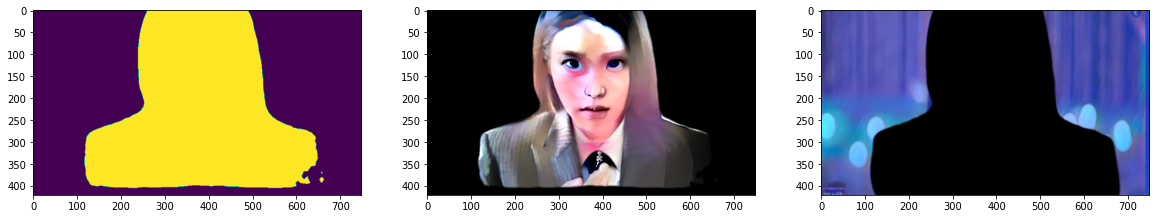

In [13]:
mask = (pred == 15).astype(float) * 255 # 15: person
_, alpha = cv2.threshold(mask, 0, 255, cv2.THRESH_BINARY)

alpha = cv2.GaussianBlur(alpha, (7, 7), 0).astype(float)

alpha = alpha / 255. # (height, width)
#연산을 하려면 이미지랑 같은 쉐이프를 가져야한다. 
alpha = np.repeat(np.expand_dims(alpha, axis=2), 3, axis=2) # (height, width, 3)

foreground = cv2.multiply(alpha, img.astype(float))
#ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ#
#사람만
result = foreground.astype(np.uint8)
Image.fromarray(result).save('C:/Study/semantic-segmentation-pytorch-master/imgs/iu_result_34.jpg')
#ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ#

background = cv2.multiply(1. - alpha, background.astype(float))  
#ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ#
#배경만
result = background.astype(np.uint8)
Image.fromarray(result).save('C:/Study/semantic-segmentation-pytorch-master/imgs/iu_result_35.png')
#ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ#
fig, axes = plt.subplots(1, 3, figsize=(20, 10))
axes[0].imshow(mask)
axes[1].imshow(foreground.astype(np.uint8))
axes[2].imshow(background.astype(np.uint8))

# Result

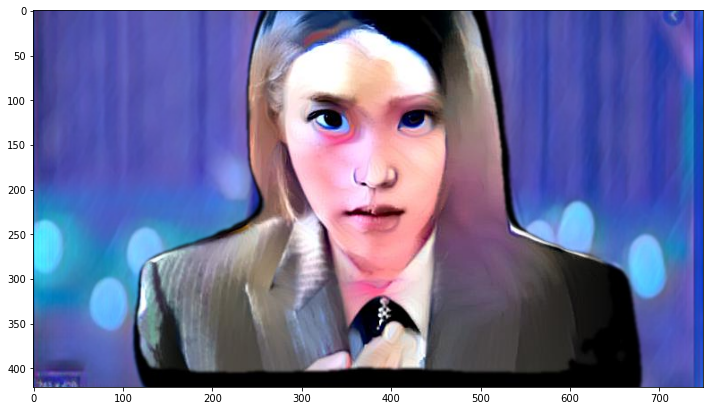

In [16]:
img = np.array(Image.open('C:/Study/semantic-segmentation-pytorch-master/imgs/iu_result_34.jpg').convert('RGB'))
background = np.array(Image.open('C:/Study/semantic-segmentation-pytorch-master/imgs/iu_result_35.png').convert('RGB'))
bg_h, bg_w, _ = background.shape

# fit to fg width
background = cv2.resize(background, dsize=(fg_w, int(fg_w * bg_h / bg_w)))

bg_h, bg_w, _ = background.shape

margin = (bg_h - fg_h) // 2

if margin > 0:
    background = background[margin:-margin, :, :]
else:
    background = cv2.copyMakeBorder(background, top=abs(margin), bottom=abs(margin), left=0, right=0, borderType=cv2.BORDER_REPLICATE)

# final resize
background = cv2.resize(background, dsize=(fg_w, fg_h))
result = cv2.add(img, background).astype(np.uint8)
plt.figure(figsize=(12, 12))
plt.imshow(result)
Image.fromarray(result).save('C:/Study/semantic-segmentation-pytorch-master/imgs/iu_result_37.jpg')


# Blur Background

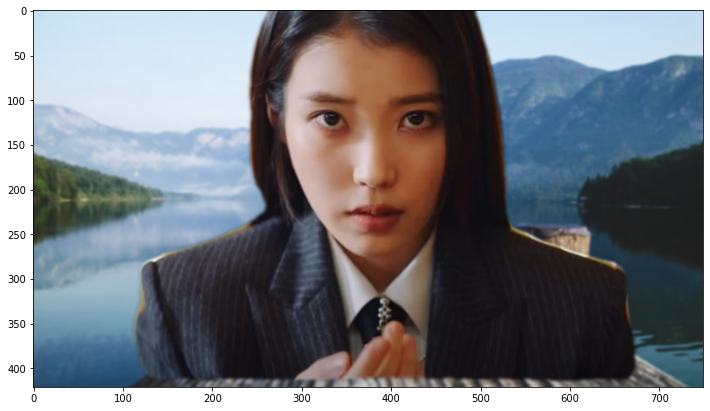

In [24]:
blurred_background = cv2.GaussianBlur(background, (5, 5), 0).astype(float)

bluured_result = cv2.add(foreground, blurred_background).astype(np.uint8)

Image.fromarray(bluured_result).save('C:/Study/semantic-segmentation-pytorch-master/imgs/iu_blur.png')

plt.figure(figsize=(12, 12))
plt.imshow(bluured_result)

# Grayscale Background

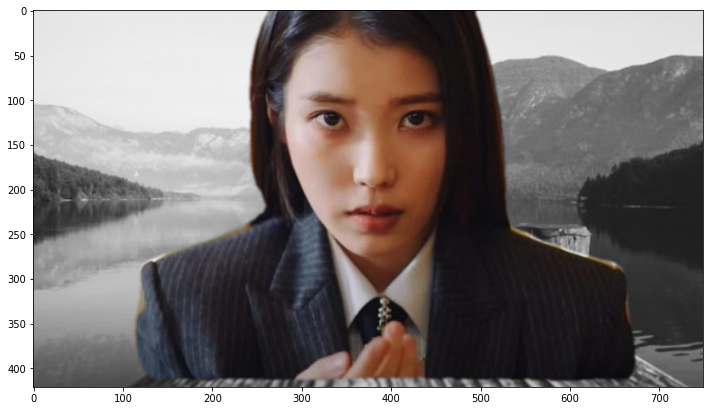

In [25]:
gray_background = cv2.cvtColor(background.astype(np.uint8), cv2.COLOR_BGR2GRAY)
gray_background = cv2.cvtColor(gray_background, cv2.COLOR_GRAY2BGR).astype(float)

gray_result = cv2.add(foreground, gray_background).astype(np.uint8)

Image.fromarray(gray_result).save('C:/Study/semantic-segmentation-pytorch-master/imgs/iu_gray.png')

plt.figure(figsize=(12, 12))
plt.imshow(gray_result)

# Other Result

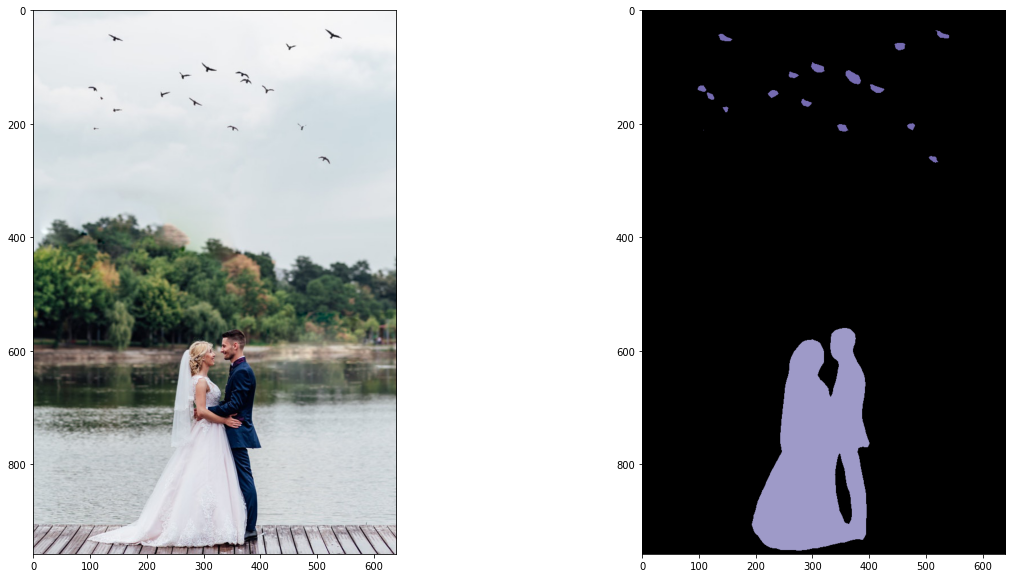

In [26]:
img = np.array(Image.open('C:/Study/semantic-segmentation-pytorch-master/imgs/06.jpg'))

fg_h, fg_w, _ = img.shape

segment_map, pred = segment(model, img)

fig, axes = plt.subplots(1, 2, figsize=(20, 10))
axes[0].imshow(img)
axes[1].imshow(segment_map)

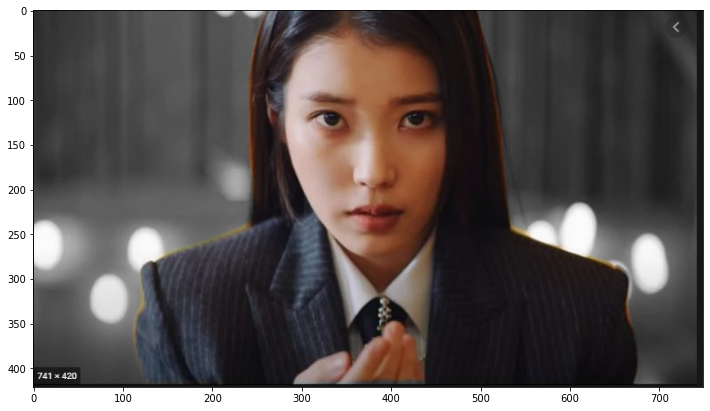

In [28]:
background = np.array(Image.open('C:/Study/semantic-segmentation-pytorch-master/imgs/iu.png'))

bg_h, bg_w, _ = background.shape

# fit to fg width
background = cv2.resize(background, dsize=(fg_w, int(fg_w * bg_h / bg_w)))

bg_h, bg_w, _ = background.shape

margin = (bg_h - fg_h) // 2

if margin > 0:
    background = background[margin:-margin, :, :]
else:
    background = cv2.copyMakeBorder(background, top=abs(margin), bottom=abs(margin), left=0, right=0, borderType=cv2.BORDER_REPLICATE)

# final resize
background = cv2.resize(background, dsize=(fg_w, fg_h))

plt.figure(figsize=(12, 8))
plt.imshow(background)

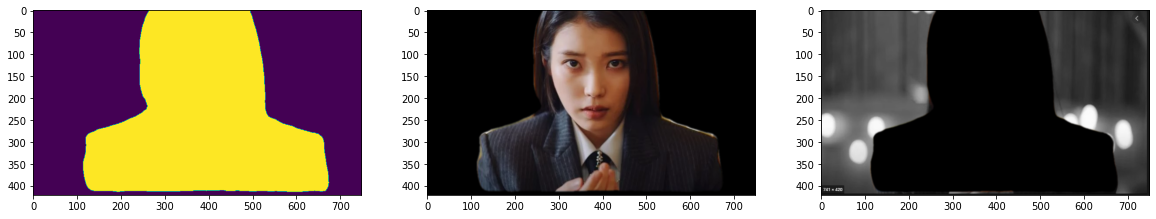

In [13]:
mask = (pred == 15).astype(float) * 255 # 15: person
_, alpha = cv2.threshold(mask, 0, 255, cv2.THRESH_BINARY)

alpha = cv2.GaussianBlur(alpha, (7, 7), 0).astype(float)

alpha = alpha / 255. # (height, width)
alpha = np.repeat(np.expand_dims(alpha, axis=2), 3, axis=2) # (height, width, 3)

foreground = cv2.multiply(alpha, img.astype(float))
background = cv2.multiply(1. - alpha, background.astype(float))  

fig, axes = plt.subplots(1, 3, figsize=(20, 10))
axes[0].imshow(mask)
axes[1].imshow(foreground.astype(np.uint8))
axes[2].imshow(background.astype(np.uint8))

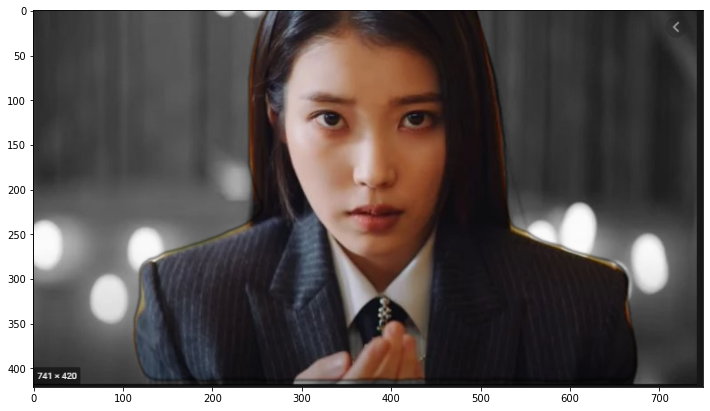

In [35]:
result = cv2.add(foreground, background).astype(np.uint8)

plt.figure(figsize=(12, 12))
plt.imshow(result)

# Add Birds

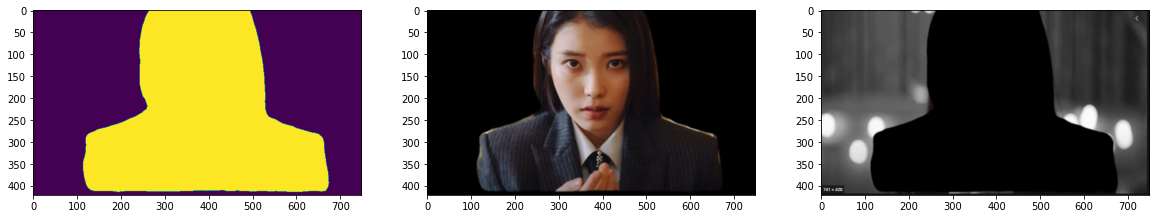

In [14]:
mask = ((pred == 15) | (pred == 3)).astype(float) * 255 # 15: person, 3: bird
_, alpha = cv2.threshold(mask, 0, 255, cv2.THRESH_BINARY)

alpha = cv2.GaussianBlur(alpha, (7, 7), 0).astype(float)

alpha = alpha / 255. # (height, width)
alpha = np.repeat(np.expand_dims(alpha, axis=2), 3, axis=2) # (height, width, 3)

foreground = cv2.multiply(alpha, img.astype(float))
background = cv2.multiply(1. - alpha, background.astype(float))  

fig, axes = plt.subplots(1, 3, figsize=(20, 10))
axes[0].imshow(mask)
axes[1].imshow(foreground.astype(np.uint8))
axes[2].imshow(background.astype(np.uint8))

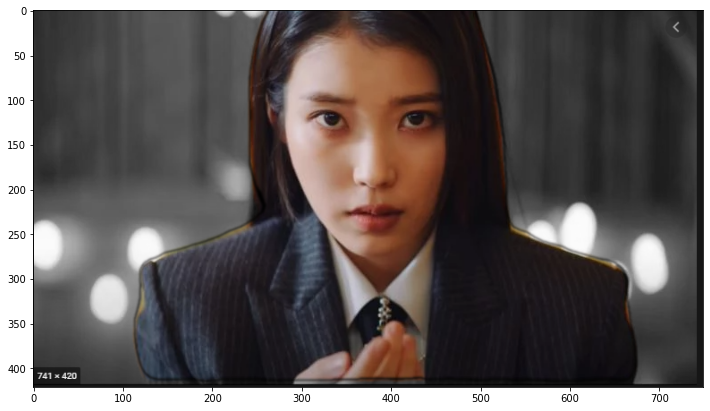

In [15]:
result = cv2.add(foreground, background).astype(np.uint8)

plt.figure(figsize=(12, 12))
plt.imshow(result)